# Introduction

Airbnb has seen a meteoric growth since its inception in 2008 with number of rentals listed on its website growing exponentially each year. Airbnb has successfully disrupted the traditional hospitality industry as more and more travellers, not just the ones who tend to take break from their work but also business travellers resort to Airbnb as their premier accomodation provider.

<img src='https://insidenanabreadshead.files.wordpress.com/2010/12/amsterdam-i-amsterdam.jpg'></img>

In [2]:
import numpy as np
import pandas as pd

# 1. Business Understanding

Here I have considered Amsterdam Airbnb dataset and did analysis using data visualizations with help of ofllowing questions.

1. Average price of listings based on bedroom type
2. Which is the most preferred neighborhood in amsterdam on user reviews.
3. Which neighborhood have highest rental prices.
4. What time of year has highest rental prices?


# 2. Data Understanding

In this we will load the data and check for for their shape and properties. We will also clean few columns which we will using on our analysis further down.


There are lot many other columns but i'm particularly interested in looking at bedrooms column and how they are related to price of the listings.

In [3]:
#Read Listings CSV file into Dataframe

listings = pd.read_csv("listings.csv", low_memory= False)
calendar = pd.read_csv("calendar.csv.gz")

In [20]:
listings.shape
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,20200709134403,2020-07-10,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi,I'm renting a bedroom (room overlooking the ga...,Quiet Garden View Room & Super Fast WiFi I'm r...,none,"Indische Buurt (""Indies Neighborhood"") is a ne...",...,t,f,strict_14_with_grace_period,f,f,1,0,1,0,2.02
1,20168,https://www.airbnb.com/rooms/20168,20200709134403,2020-07-10,Studio with private bathroom in the centre 1,17th century Dutch townhouse in the heart of t...,For those who like all facets of city life. In...,17th century Dutch townhouse in the heart of t...,none,Located just in between famous central canals....,...,t,f,strict_14_with_grace_period,f,f,2,0,2,0,2.70
2,25428,https://www.airbnb.com/rooms/25428,20200709134403,2020-07-10,Lovely apt in City Centre (w.lift) near Jordaan,Lovely apt in Centre ( lift & fireplace) near ...,"This nicely furnished, newly renovated apt is...",Lovely apt in Centre ( lift & fireplace) near ...,none,NaN,...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,0.17
3,27886,https://www.airbnb.com/rooms/27886,20200709134403,2020-07-10,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,For a romantic couple: A beautifully restored ...,Stylish and romantic houseboat on fantastic hi...,none,"Central, quiet, safe, clean and beautiful.",...,t,f,strict_14_with_grace_period,f,f,1,0,1,0,2.10
4,31080,https://www.airbnb.com/rooms/31080,20200709134403,2020-07-10,2-story apartment + rooftop terrace,NaN,My apartment is light and cosy. The three bed...,My apartment is light and cosy. The three bed...,none,NaN,...,f,f,moderate,f,f,1,1,0,0,0.29


# 3. Data Preparation

Clean price column in both datasets to remove $ sign and change the datatype to float.

We are considering columns listings with price > 0 and number of reviews more than 0.

function to calculate average values for the column

In [14]:
# we are creating function here to clean price column in both datasets

def clean_price( x ):
    ''' Cleans price by removing '$' sign.,
        and change datatype to float.
    '''
    return(x.replace('[\$,]','', regex= True).astype(float))


# function to calculate mean values in column2 grouping by column1

def get_grp_mean( df ):
    
    ''' group by column X and return col y.
    '''
    
    df.columns = ['x','y']
    df = df.groupby(['x']).y.mean()
    df = df.reset_index()
    return(df.sort_values('y', ascending= [0]))


#clean price column and only consider ones with >0
listings.price = clean_price(listings.price)
listings = listings[listings.price >0]

listings = listings[listings.number_of_reviews >0]

calendar.price = clean_price(calendar.price)
calendar = calendar[calendar.price >0]

In [42]:
bedrooms_val_counts = listings.bedrooms.value_counts()

bedrooms_val_counts

1.0     11537
2.0      4641
3.0      1639
0.0      1018
4.0       485
5.0        78
6.0        12
12.0        6
8.0         5
7.0         3
10.0        3
9.0         3
11.0        1
Name: bedrooms, dtype: int64

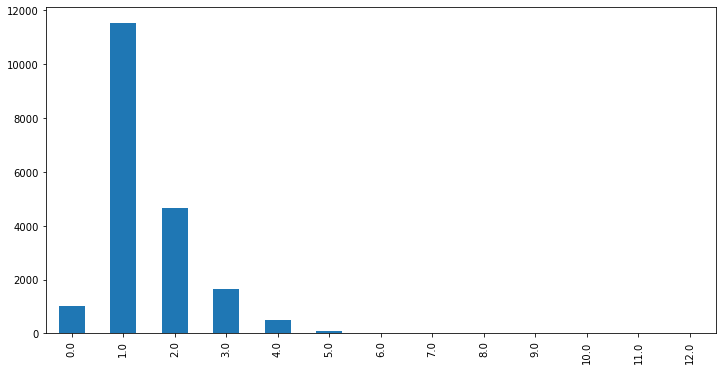

In [43]:
#we can bar chart them for better understanding.

bedrooms_val_counts.sort_index().plot.bar(figsize = (12,6))

In [104]:
#now lets look at how the listings with various bedroom counts are priced.

bedrooms = listings.groupby('bedrooms')
bedrooms["price"].describe()

,count,mean,std,min,25%,50%,75%,max
bedrooms,,,,,,,,
0.0,873.0,119.797251,176.359474,25.0,85.0,100.0,130.00,5040.0
1.0,10133.0,130.869831,189.515351,5.0,90.0,115.0,150.00,9000.0
2.0,4021.0,193.312111,99.690692,9.0,130.0,175.0,230.00,1750.0
3.0,1380.0,230.613768,164.755558,42.0,150.0,200.0,270.00,4500.0
4.0,393.0,279.167939,158.169317,35.0,175.0,249.0,325.00,1150.0
5.0,66.0,366.015152,269.296890,89.0,198.5,300.0,443.75,2000.0
6.0,8.0,466.000000,171.404284,65.0,490.0,496.5,512.50,650.0
7.0,3.0,433.000000,300.860433,124.0,287.0,450.0,587.50,725.0
8.0,4.0,575.000000,217.485632,440.0,470.0,480.0,585.00,900.0


# 1. Average Price of listings by Bedroom

lets now look at bar chart of the average price of the listings grouped by bedroom

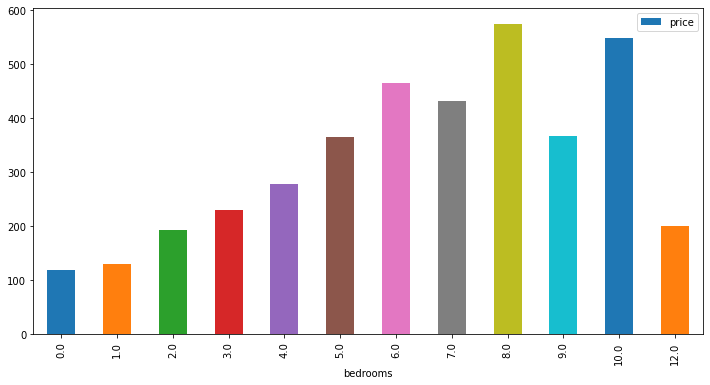

In [105]:
import matplotlib.pyplot as plt

N = 13
cmap = plt.cm.tab10
colors = cmap(np.arange(len(bedrooms)) % cmap.N)
bedrooms.mean().plot.bar(y='price', figsize = (12,6),color= colors)

plt.show()



Graph looks okay but doesnt exactly follow our intuition about how price should go up with bedroom count. we can see that 0 bedroom (couldbe studio listings) have an average price that is almost equal to single bedroom listings.

studio listings being only lodges for single person so the prices for 1bedroom and Studios could almost be same.
Average price listed for 11BD is low and can be removed from analysis for better understanding as there is only one listing avaiable with 11BD.

# 2. Most Preferred neighborhood based on reviews

We are grouping by neighborhood and calculating average number of reviews for the available listings

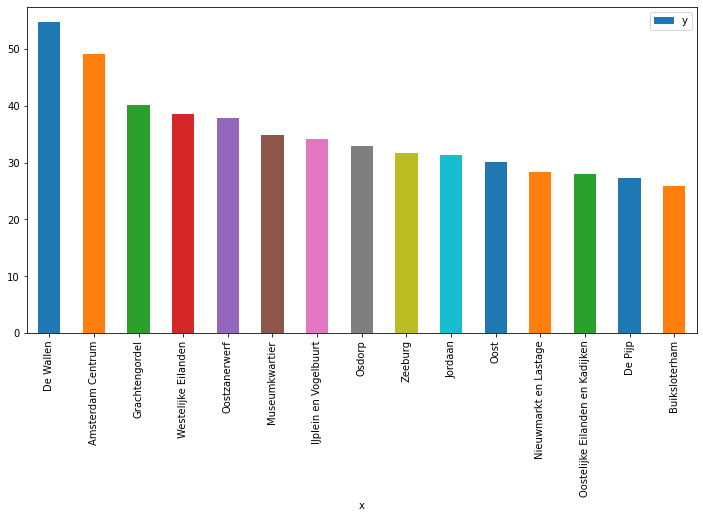

In [94]:
rev_df = get_grp_mean(listings[['neighbourhood','number_of_reviews']])

rev_df.head(15).plot.bar(x = 'x',y = 'y',figsize = (12,6),color =colors)



De Wallen and Amsterdam Centrum neighbourhoods got more number of reviews and looks like preferred by more number of users.

# 3. Neighborhood with highest rental prices.

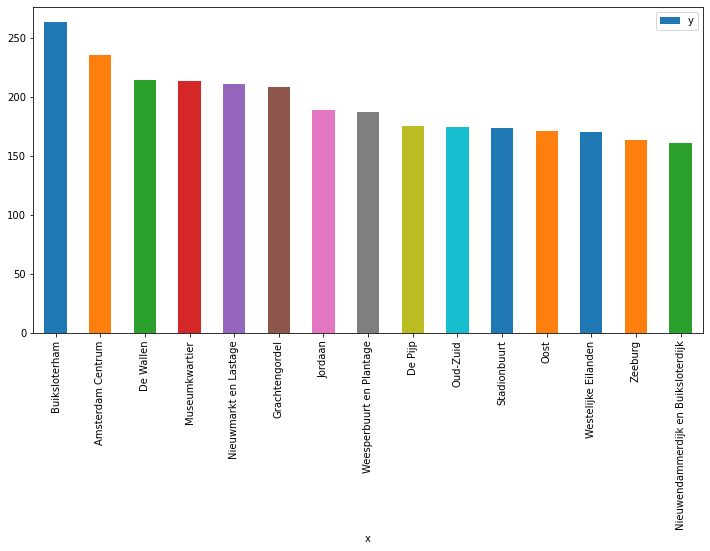

In [107]:
# Neighbourhoods with highest price
price_df = get_grp_mean(listings[['neighbourhood','price']])

price_df.head(15).plot.bar(x = 'x', y = 'y', figsize = (12,6),color =colors)

# 4. What time of the year has highest rental prices?

In [96]:
#utilizing calendar dataset to calculate check highest price for listings during which timeline

calendar['date'] = pd.to_datetime(calendar['date'], infer_datetime_format= True)

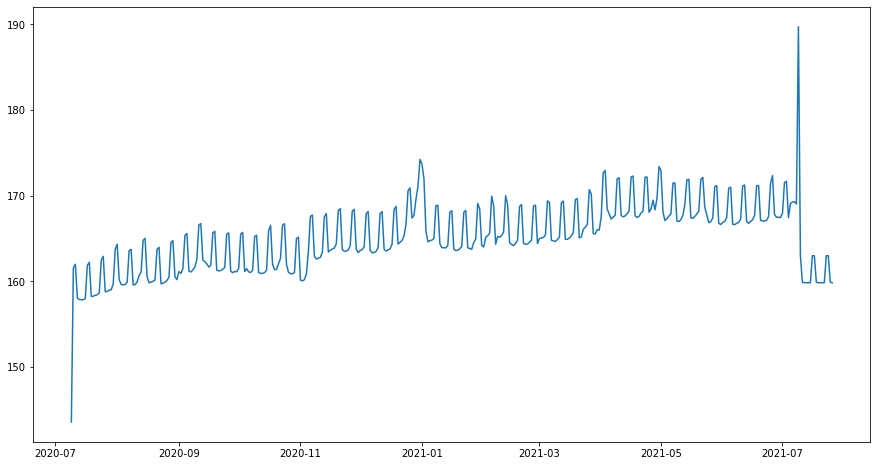

In [108]:
timeln = get_grp_mean(calendar[['date','price']])

timeln = timeline.sort_values(by='x', ascending=True)

plt.figure(figsize=(15,8))
plt.plot(timeln['x'],timeline['y'])

# Evaluation

With above graphs we can infer:
1. Buiksloterham is the neighborhood with highest price in Amsterdam.
1. During July-2021 , listings are booked with highest price

# Conclusion

In this article, we tried answering questions with available datasets and utilizing libraries.

To see more about this analysis, see the link to my medium post available [here](https://medium.com/@mail2swetharangu/amsterdam-airbnb-data-analysis-112fecf0f2b8).